# Dense network

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [1]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy(verbose=False)

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout



In [3]:
X['trainX'].shape
data['FEATURE_SIZE']

2048

In [4]:

# Number of outputs
NB_CLASS=len(data['class_name'])


# Create model
model_1n = Sequential()

# Hidden layer
model_1n.add(Dense(
    units=512, activation=activations.relu, input_dim=data['FEATURE_SIZE'],
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))

# Output layer
model_1n.add(Dense(
    units=NB_CLASS, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.001)
))
          

# Print network summary
model_1n.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 1,052,166
Trainable params: 1,052,166
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model_1n.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_1n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 1,052,166
Trainable params: 1,052,166
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model_1n.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [7]:
# Fit model
history = model_1n.fit(
    x=X['trainX'], y=y['trainX'],
    validation_split=0.2, batch_size=64, epochs=30,
    shuffle=True # Shuffle training samples
)

Train on 336 samples, validate on 84 samples
Epoch 1/30
336/336 [==============================] - 1s 2ms/step - loss: 2.8518 - acc: 0.1905 - val_loss: 2.6779 - val_acc: 0.2976
Epoch 2/30
336/336 [==============================] - 0s 410us/step - loss: 2.3493 - acc: 0.6548 - val_loss: 2.5266 - val_acc: 0.4643
Epoch 3/30
336/336 [==============================] - 0s 263us/step - loss: 2.1219 - acc: 0.7232 - val_loss: 2.3651 - val_acc: 0.4881
Epoch 4/30
336/336 [==============================] - 0s 212us/step - loss: 1.9627 - acc: 0.7649 - val_loss: 2.1915 - val_acc: 0.6548
Epoch 5/30
336/336 [==============================] - 0s 213us/step - loss: 1.8452 - acc: 0.8095 - val_loss: 2.0942 - val_acc: 0.7143
Epoch 6/30
336/336 [==============================] - 0s 213us/step - loss: 1.7502 - acc: 0.8512 - val_loss: 2.0259 - val_acc: 0.7262
Epoch 7/30
336/336 [==============================] - 0s 244us/step - loss: 1.6791 - acc: 0.8512 - val_loss: 1.9255 - val_acc: 0.7976
Epoch 8/30
336/336 

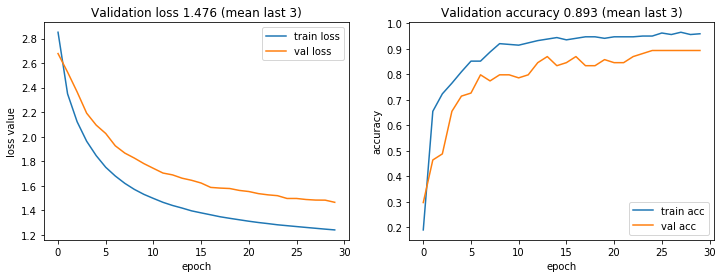

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [9]:
(test_loss, test_accuracy) = model_1n.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

51/51 [==============================] - 0s 219us/step
Test loss: 1.30
Test accuracy: 94.12%


## 2-N layer

In [10]:
import tensorflow.keras as keras
from tensorflow.keras import activations


# Number of outputs
NB_CLASS=len(data['class_name'])


# Convolutional Network
model_2n = keras.Sequential()


model_2n.add(keras.layers.Dense(units=512, activation='relu', input_shape=(data['FEATURE_SIZE'],)))
model_2n.add(keras.layers.Dense(units=32, activation='relu'))
model_2n.add(keras.layers.Dense(units=NB_CLASS, activation='softmax'))

model_2n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 1,065,702
Trainable params: 1,065,702
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
model_2n.compile(optimizer=keras.optimizers.Adamax(), loss='categorical_crossentropy', metrics=['acc'])

In [12]:
# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

In [13]:
# Fit model
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y['trainX'])

history = model_2n.fit(
    x=X['trainX'], y=y_categorical,
    validation_split=0.2, epochs=100,
    callbacks=[early_stopping],
    steps_per_epoch=10,
    shuffle=True # Shuffle training samples
)

model_2n.fit()

Epoch 1/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.8334 - acc: 0.6659

TypeError: float() argument must be a string or a number, not 'NoneType'

In [ ]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(data['FEATURE_SIZE'],)))
# model.add(keras.layers.Dropout(rate=0.5))
model_3.add(tf.keras.layers.Dense(128, activation='relu'))
#model_3.add(tf.keras.layers.Dense(32, activation='relu'))
model_3.add(tf.keras.layers.Dense(6, activation='softmax'))
# model_3.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Compile the model
model_3.compile(optimizer=keras.optimizers.Adamax(), loss='sparse_categorical_crossentropy', metrics=['acc'])
model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])


# model_3.compile(optimizer=keras.optimizers.Adamax(), loss='mse', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# This builds the model for the first time:
history=model_3.fit(X['trainX'], y['trainX'], batch_size=64, epochs=30, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [ ]:
(test_loss, test_accuracy) = model_3.evaluate(X['test'], y['test'], batch_size=16)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%

In [ ]:
pd.DataFrame(model_3.predict(X['train'][100:101]))
